## Word cloud from Obama's 2010 and Trump's 2018 State of the Union speeches.

### To simplify this notebook, I wrote a few functions and put them into the wcfuncs.py file. So let's import them.

In [1]:
from wcfuncs import replace_strings, make_wordcloud

### Now let's define the names of the input and output files.

In [2]:
# Input files with raw text
in_filename  = ['./textfiles/SoU_Trump2018.txt', './textfiles/SoU_Obama2010.txt']
out_filename = ['./WordClouds/Trump2018_wc.pdf', './WordClouds/Obama2010_wc.pdf']

# Create dict where keys are in_files and values are out_files
inout_dict = dict(zip(in_filename, out_filename))

### Wordcloud excludes stopwords from the word clouds it generates. It has a default set of stopwords for English language, but you may want to exclude additional words from the cloud.

In [3]:
# Read custom stopwords from file
cs_file="./textfiles/custom_stopwords.txt"
f = open(cs_file, 'r')

# Read as string; split all words; convert to set
cs = set(f.read().split())

# Close file
f.close()

# Include capitalized and uncapitalized first character in each word.
# Remember that two sets can be joined using the union method of the set class.
cs = cs.union(
    {word[0].lower() + word[1:] for word in cs if word.istitle()}.union(
        {word[0].upper() + word[1:] for word in cs if not word.istitle()}))

### You may want to reduce some words to a single one that expresses the same idea. For example, I reduce the words "American" and "America" to "America". I also reduce the words "jobs" and "job" and a few other singular/plural pairs that appear often. 

In [4]:
# Read words to be reduced from file (key to value)
rd_file="./textfiles/reduction_dict.txt"
f = open(rd_file, 'r') 

# Read as string, split all lines
rd = set(f.read().splitlines())    

# Split each line into [key,value] and then convert to dict
rd = dict([pair.split() for pair in rd])

# Close file
f.close()

### Finally... generate word clouds!

./WordClouds/Obama2010_wc.pdf


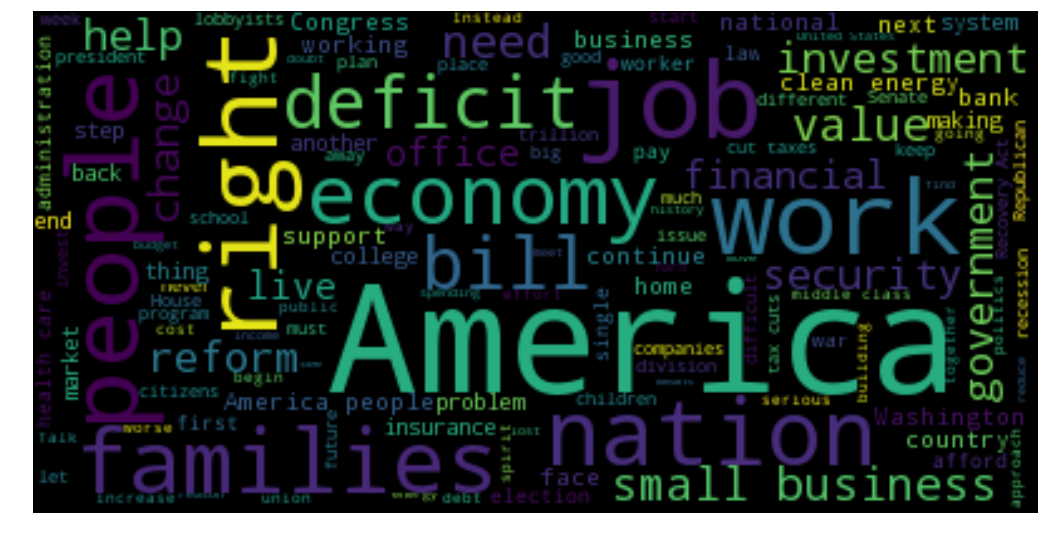

./WordClouds/Trump2018_wc.pdf


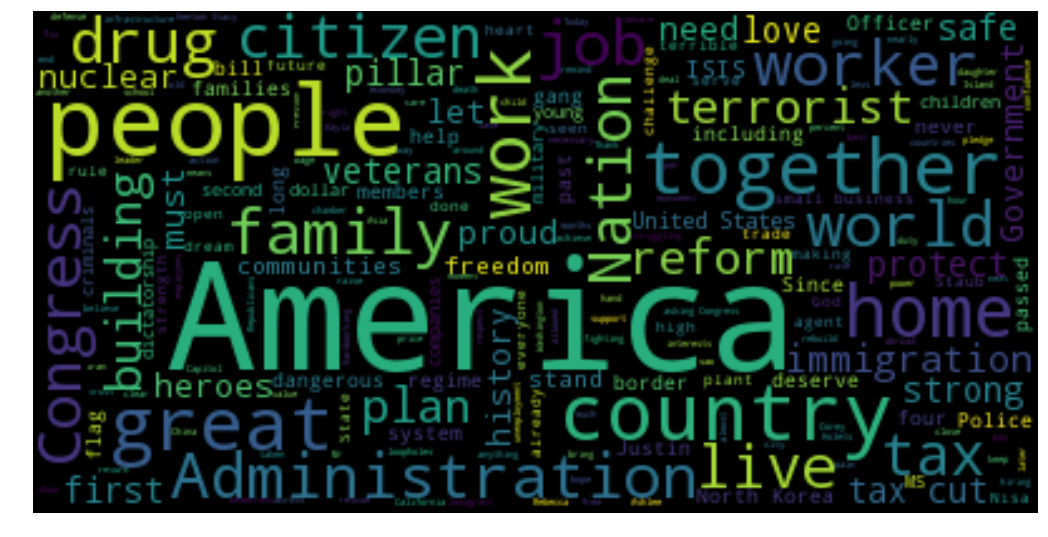

In [5]:
for k,v in inout_dict.iteritems():
    
    in_filename = k
    out_filename= v
    
    # Read text from file
    f = open(in_filename, 'r')
    text = f.read()
    f.close()
    
    # Generate
    print out_filename
    make_wordcloud(
        text, 
        out_filename,
        custom_sw = cs, 
        reduction = rd,
        figure_size = (18,12),
        display=True)

### Well, apparently both presidents love the word "America".

### So that's it! The word clouds have been generated from the State of the Union speeches after reducing a few words (see reduction_dict.txt) and removing a few others (see custom_stopwords.txt). 

#### Note: The function make_wordcloud has many hardcoded options that can be edited to change the appearence of the word cloud. Check out the initialization of the Wordcloud instance and, of course, the original repo by Andreas Mueller if you want to play around with them!